<a href="https://colab.research.google.com/github/vis-hal-k/Internship_Data_science/blob/main/DataScience_Topics/Tranfer_Learning_practice/Tranfer_learning_feature_extraction(with_data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Data_set li
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [32]:
import tensorflow as tf 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Flatten 
from keras.applications.vgg16 import VGG16 

In [ ]:
# Lets  make object of VGG16 
conv_base = VGG16(weights ='imagenet',
                  include_top= False ,
                  # include_top=False means we importing up to only convolutional part .
                  input_shape=(150,150,3)   
                  )

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# Now we made our own sequential model 
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False # this is to freeze the conv_base for training

In [ ]:
# Now let check the number of trainable params
conv_base.summary()
# It conv_base the trainable parameter is Zero 
model.summary()
#  and in this obvioulsy the trainable params is reduced.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img , img_to_array , array_to_img

In [ ]:
batch_size = 32 
train_datagen = ImageDataGenerator(
    rescale =1./255,
    shear_range =0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/train' ,
    target_size = (150,150) ,
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/content/test' ,
    target_size = (150,150) ,
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
# Now we compile 
model.compile(optimizer ='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [31]:
history = model.fit_generator(train_generator, epochs = 10 , validation_data = validation_generator)

<ipython-input-31-2da634ddcc5e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 10 , validation_data = validation_generator)


Epoch 1/10
625/625 [==============================] - 197s 297ms/step - loss: 0.3013 - accuracy: 0.8701 - val_loss: 0.2120 - val_accuracy: 0.9074
Epoch 2/10
625/625 [==============================] - 188s 302ms/step - loss: 0.2370 - accuracy: 0.8982 - val_loss: 0.2067 - val_accuracy: 0.9146
Epoch 3/10
625/625 [==============================] - 187s 299ms/step - loss: 0.2209 - accuracy: 0.9073 - val_loss: 0.1927 - val_accuracy: 0.9174
Epoch 4/10
625/625 [==============================] - 187s 299ms/step - loss: 0.2069 - accuracy: 0.9107 - val_loss: 0.1893 - val_accuracy: 0.9198
Epoch 5/10
625/625 [==============================] - 188s 301ms/step - loss: 0.2004 - accuracy: 0.9147 - val_loss: 0.2358 - val_accuracy: 0.8978
Epoch 6/10
625/625 [==============================] - 186s 298ms/step - loss: 0.1876 - accuracy: 0.9212 - val_loss: 0.2093 - val_accuracy: 0.9118
Epoch 7/10
625/625 [==============================] - 182s 292ms/step - loss: 0.1779 - accuracy: 0.9247 - val_loss: 0.1928 -

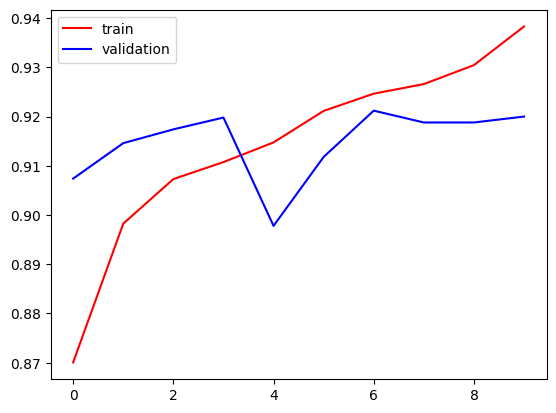

In [33]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'] , color ='red' , label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue' , label='validation')
plt.legend()
plt.show()

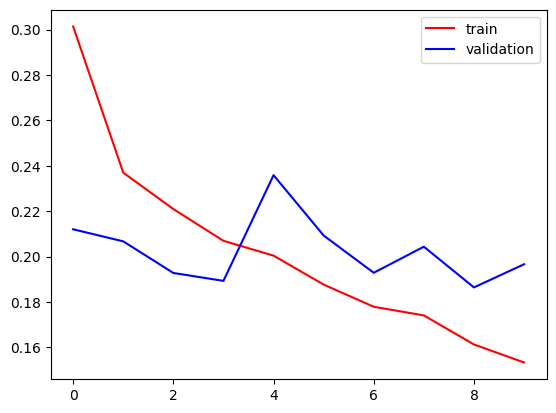

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()